# OPTICS
> Ordering Points To Identify the Clustering Structure

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
from utils.functions_09 import process_and_merge_data

from utils.functions_08 import plot_dsc_values_with_mean
from utils.functions_08 import analyze_clusters_with_percentages

In [3]:
df_dsc = pd.read_csv("data/010_dsc.csv", index_col=0)
df_dsc

,Probenbezeichnung,Konzentration_ppm,Matrix,Polymer,Masse Polymer,Alterung,mProben_mg,dHm_J/g,Tm_C
Nummer,,,,,,,,,
L001,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,NaN,NaN,8.34,5.675,130.7
L002,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,NaN,NaN,8.49,4.522,130.8
L003,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,NaN,NaN,7.86,5.084,130.7
L004,Mod.S-PE_1_50ppm,50,Modellsand,Polyethylen,NaN,NaN,8.59,4.175,130.3
L005,Mod.S-PE_1_50ppm,50,Modellsand,Polyethylen,NaN,NaN,8.39,5.796,130.5
...,...,...,...,...,...,...,...,...,...
L371,DS Sand-PE-20ppm-1_2,20,Sand,Polyethylen,NaN,NaN,1.05,147.800,130.5
L372,DS Sand-PE-20ppm-1_2,20,Sand,Polyethylen,NaN,NaN,1.09,150.600,130.5
L373,DS Sand-PE-20ppm-2_2,20,Sand,Polyethylen,NaN,NaN,1.00,144.900,130.6


In [4]:
file_path = "data/030_dsc_experiments.csv"
df_experiments = pd.read_csv(file_path, index_col=0)

columns_s5 = [col for col in df_experiments.columns if "_S5" in col]
df_experiments_s5 = df_experiments[columns_s5]
df_experiments_s5.head()

,L001_S5,L002_S5,L003_S5,L004_S5,L005_S5,L006_S5,L007_S5,L008_S5,L009_S5,L010_S5,...,L378_S5,L379_S5,L380_S5,L381_S5,L382_S5,L383_S5,L384_S5,L385_S5,L386_S5,L387_S5
Temp./°C,,,,,,,,,,,,,,,,,,,,,
-24,0.16598,0.15589,0.15900,0.16244,0.17739,0.15898,0.19158,0.12865,0.16992,0.15554,...,0.18864,0.17923,0.16501,0.17974,0.19352,0.17461,0.19298,0.18028,0.19231,0.19564
-23,0.16647,0.15648,0.15971,0.16288,0.17797,0.15965,0.19234,0.12905,0.17126,0.15602,...,0.18901,0.17957,0.16534,0.18038,0.19412,0.17530,0.19361,0.18083,0.19302,0.19661
-22,0.16703,0.15707,0.16041,0.16350,0.17882,0.16053,0.19321,0.12990,0.17218,0.15668,...,0.18936,0.17976,0.16552,0.18118,0.19484,0.17578,0.19430,0.18136,0.19379,0.19738
-21,0.16769,0.15773,0.16099,0.16419,0.17962,0.16126,0.19418,0.13042,0.17261,0.15750,...,0.18964,0.18014,0.16566,0.18214,0.19572,0.17655,0.19511,0.18202,0.19448,0.19795
-20,0.16849,0.15857,0.16159,0.16484,0.18030,0.16198,0.19513,0.13134,0.17323,0.15821,...,0.19009,0.18050,0.16584,0.18279,0.19643,0.17710,0.19593,0.18269,0.19512,0.19866


## I) Intervalle

### 1) Daten einlesen

In [5]:
interval_data = pd.read_csv("data/05x_dsc_experiments_normalized_intervals.csv", index_col=0)
interval_data

,"[-25, -5)","[-5, 15)","[15, 35)","[35, 55)","[55, 75)","[75, 95)","[95, 115)","[115, 135)","[135, 155)","[155, 175)","[175, 195)","[195, 215)","[215, 235)","[235, 255)","[255, 275)"
Probe,,,,,,,,,,,,,,,
L001_S5,-0.409775,-0.400449,-0.389641,-0.380218,-0.369950,-0.361466,-0.350984,-0.326757,-0.340201,-0.328247,-0.314883,-0.303720,-0.291783,-0.279244,-0.266946
L002_S5,-0.430105,-0.420957,-0.411449,-0.401776,-0.391775,-0.383122,-0.372093,-0.346959,-0.358927,-0.347063,-0.333821,-0.323707,-0.313462,-0.302590,-0.291381
L003_S5,-0.423493,-0.414713,-0.405592,-0.395556,-0.386346,-0.378948,-0.368215,-0.340201,-0.356403,-0.344092,-0.329523,-0.317811,-0.305474,-0.292270,-0.279037
L004_S5,-0.418961,-0.414369,-0.406470,-0.397428,-0.389731,-0.383091,-0.372984,-0.348708,-0.358773,-0.346115,-0.330911,-0.317903,-0.304724,-0.292959,-0.280454
L005_S5,-0.387591,-0.382980,-0.373814,-0.362412,-0.351413,-0.341765,-0.330902,-0.313030,-0.317008,-0.305931,-0.292917,-0.282687,-0.271345,-0.260785,-0.249944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L383_S5,-0.393431,-0.383219,-0.373145,-0.362479,-0.351026,-0.338704,-0.329780,-0.334494,-0.291703,-0.276513,-0.259814,-0.243557,-0.227633,-0.213402,-0.200450
L384_S5,-0.356280,-0.344942,-0.330514,-0.315836,-0.300962,-0.285687,-0.275729,-0.293425,-0.220209,-0.198126,-0.173821,-0.150114,-0.125819,-0.099549,-0.079439
L385_S5,-0.382964,-0.373991,-0.363618,-0.352263,-0.338732,-0.325401,-0.314765,-0.317284,-0.274411,-0.258304,-0.241273,-0.225589,-0.211926,-0.197541,-0.184160


### 2) OPTICS anwenden

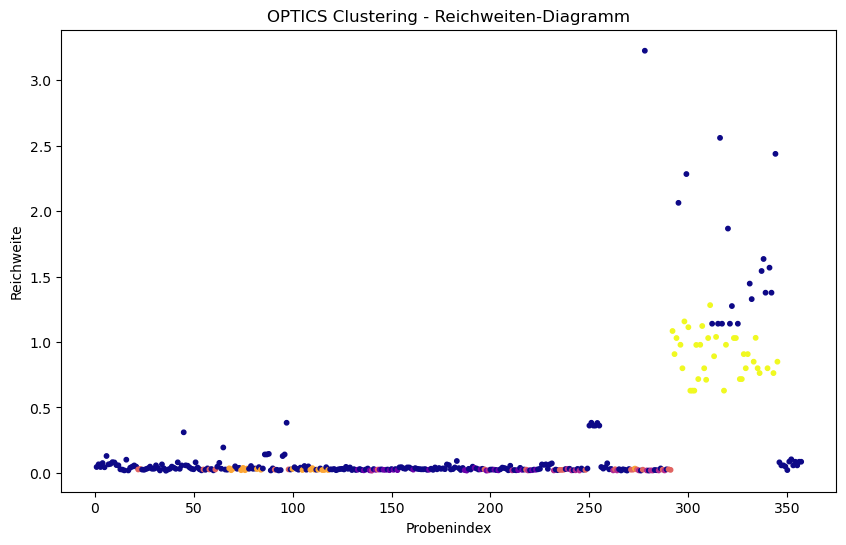

In [6]:
data = interval_data.copy()

# OPTICS-Clustering ausführen
optics = OPTICS(min_samples=5, xi=0.02, min_cluster_size=0.05)
optics.fit(data)

# Labels und Reichweitenextraktion
labels = optics.labels_
reachability = optics.reachability_

# Ergebnisse visualisieren
plt.figure(figsize=(10, 6))
plt.scatter(range(len(labels)), reachability, c=labels, cmap='plasma', s=10)
plt.title("OPTICS Clustering - Reichweiten-Diagramm")
plt.xlabel("Probenindex")
plt.ylabel("Reichweite")
plt.show()


### 3) Cluster analysieren

In [7]:
# Cluster analysieren

# Anzahl der Cluster (exkl. Rauschen)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Anzahl der Cluster: {n_clusters}")
print(f"Anzahl der rauschenhaften Punkte: {n_noise}")


Anzahl der Cluster: 5
Anzahl der rauschenhaften Punkte: 241


In [8]:
# Cluster-Zuordnung
data['Cluster'] = labels

# Cluster-Zusammenfassung
cluster_summary = data.groupby('Cluster').mean()
cluster_summary

,"[-25, -5)","[-5, 15)","[15, 35)","[35, 55)","[55, 75)","[75, 95)","[95, 115)","[115, 135)","[135, 155)","[155, 175)","[175, 195)","[195, 215)","[215, 235)","[235, 255)","[255, 275)"
Cluster,,,,,,,,,,,,,,,
-1,-0.221448,-0.226511,-0.228492,-0.228988,-0.228628,-0.227816,-0.223311,-0.192944,-0.234270,-0.235568,-0.236235,-0.237072,-0.237910,-0.238869,-0.239763
0,-0.358405,-0.358742,-0.357519,-0.358440,-0.358658,-0.358612,-0.362082,-0.371444,-0.354435,-0.354016,-0.353526,-0.353074,-0.352279,-0.351919,-0.350145
1,-0.401205,-0.399759,-0.399650,-0.399554,-0.398616,-0.396818,-0.395838,-0.394257,-0.387276,-0.384807,-0.381464,-0.377898,-0.374364,-0.370359,-0.365928
2,-0.431271,-0.431843,-0.433262,-0.433769,-0.434180,-0.434040,-0.433116,-0.418699,-0.433364,-0.432495,-0.431268,-0.430118,-0.428447,-0.426420,-0.424370
3,-0.467785,-0.470347,-0.472424,-0.474909,-0.477890,-0.479701,-0.478477,-0.446617,-0.492047,-0.495110,-0.498169,-0.500344,-0.501594,-0.502746,-0.502729
4,2.411350,2.446479,2.460873,2.466355,2.465467,2.460026,2.430405,2.206728,2.502157,2.510498,2.513937,2.518015,2.521083,2.524753,2.526248


### 4) Visualisierung in 2D (PCA)

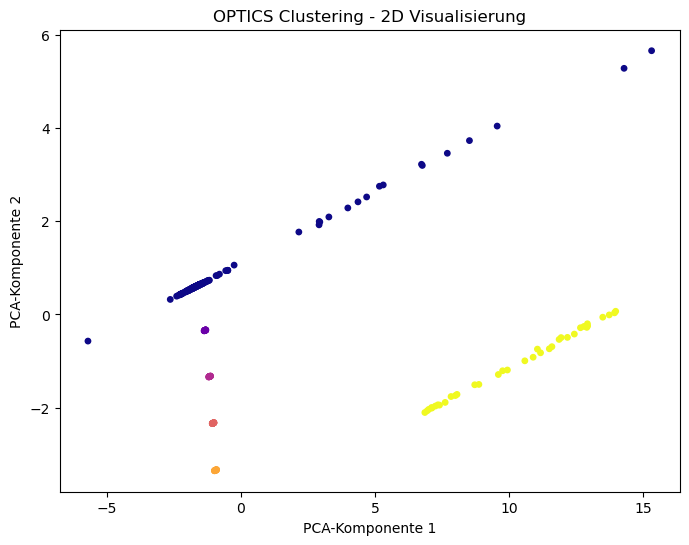

In [9]:
# PCA für 2D-Visualisierung
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# Visualisierung
plt.figure(figsize=(8, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap="plasma", s=15)
plt.title("OPTICS Clustering - 2D Visualisierung")
plt.xlabel("PCA-Komponente 1")
plt.ylabel("PCA-Komponente 2")
plt.show()


### 5) Plot der Kurven je Cluster

In [10]:
cluster_to_samples = (data.reset_index()  # Index als Spalte hinzufügen
    .groupby('Cluster')['Probe']  # 'Probe' ist jetzt eine Spalte
    .apply(list)
    .to_dict()
)

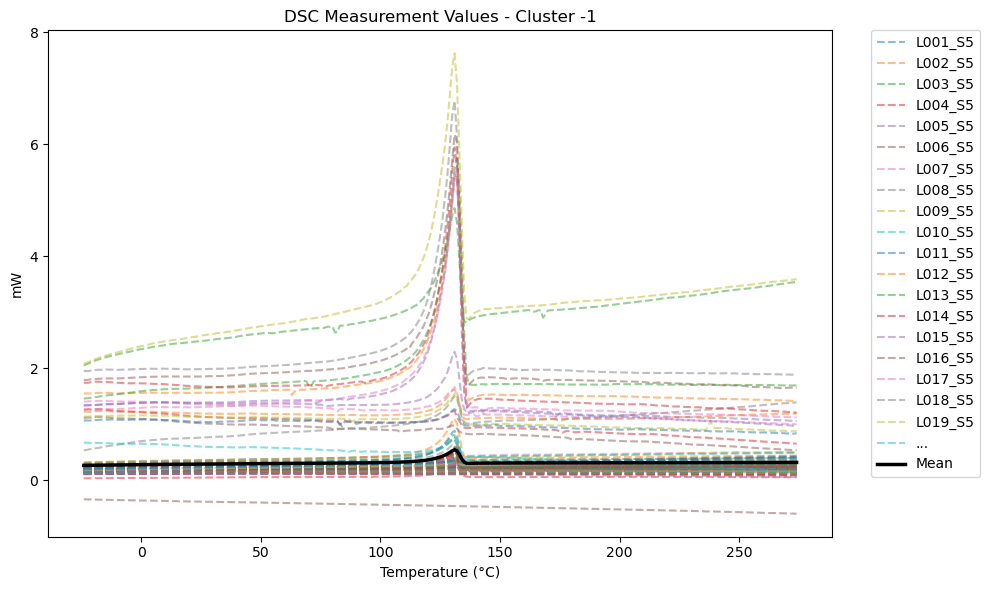

                    Count  Anteil (%)
Matrix                               
Modellsand             76       31.54
Sediment Weißeritz     42       17.43
Sand                   35       14.52
Sediment Elbe          23        9.54
Nicht vorhanden        65       26.97
------------------------------------------------------------------------------------------------------------------------


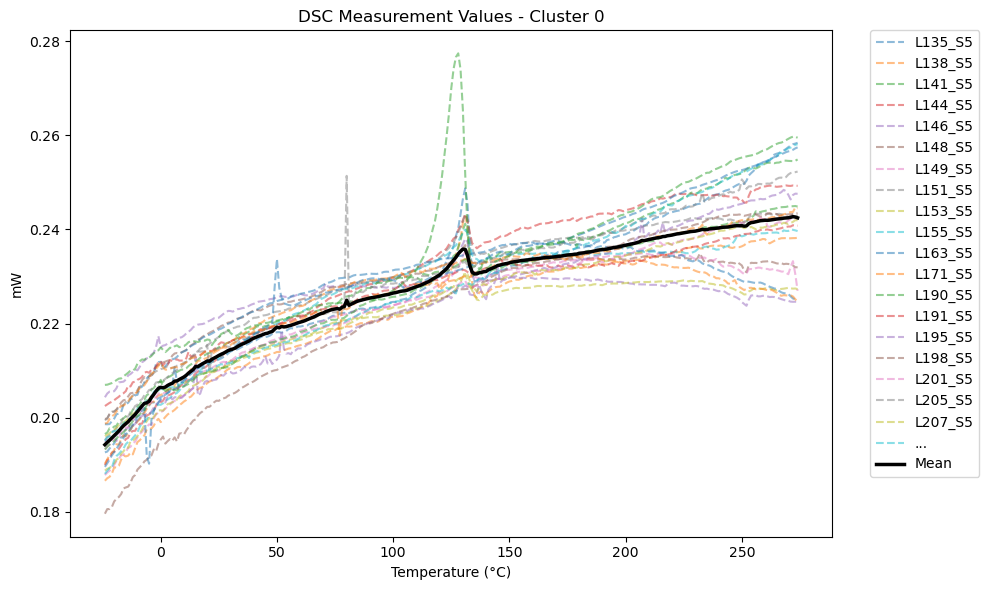

                    Count  Anteil (%)
Matrix                               
Sand                   10       43.48
Sediment Weißeritz      8       34.78
Modellsand              1        4.35
Nicht vorhanden         4       17.39
------------------------------------------------------------------------------------------------------------------------


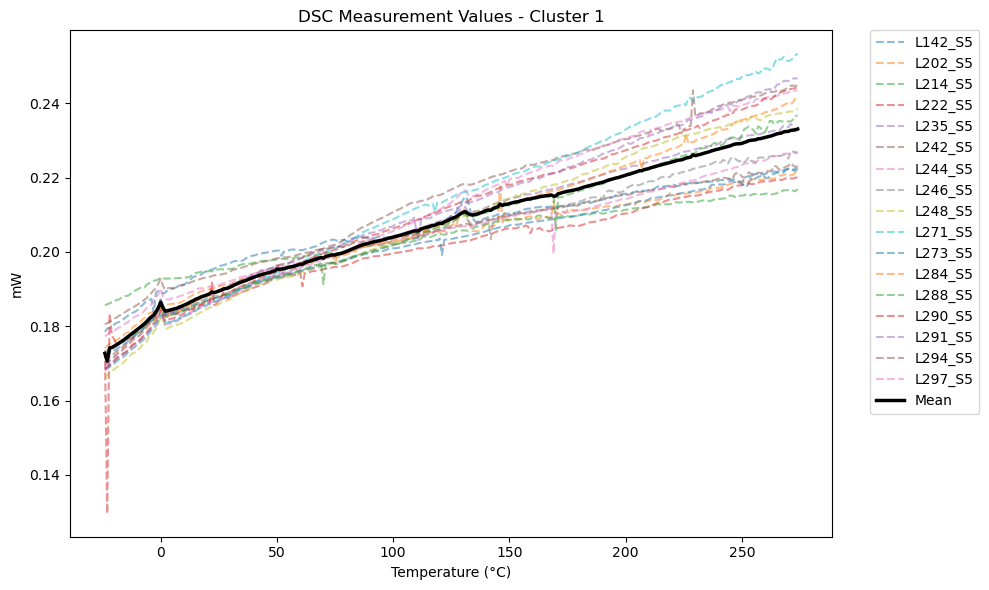

                    Count  Anteil (%)
Matrix                               
Sediment Elbe          13       76.47
Sand                    1        5.88
Sediment Weißeritz      1        5.88
Nicht vorhanden         2       11.76
------------------------------------------------------------------------------------------------------------------------


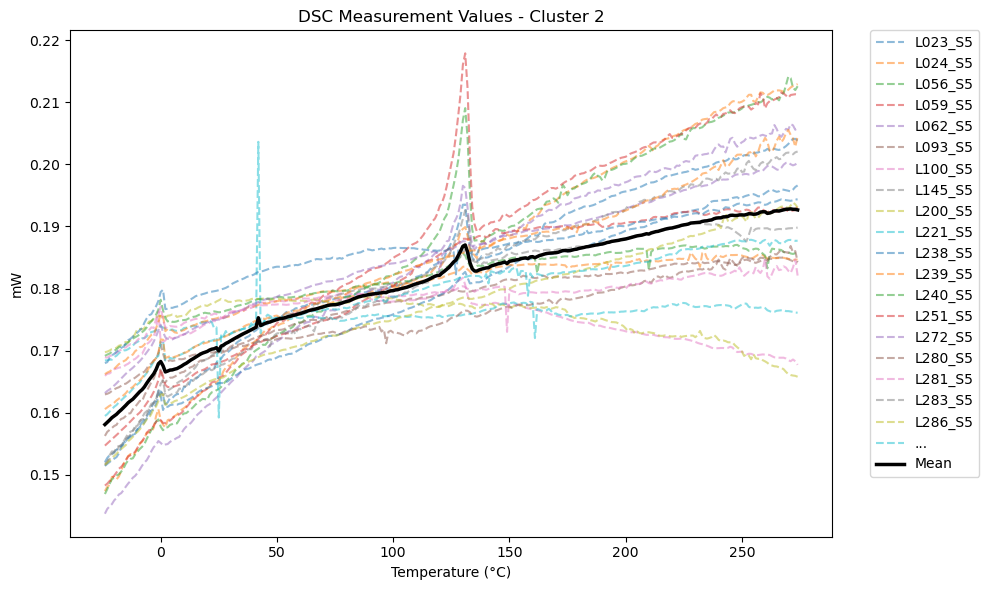

                    Count  Anteil (%)
Matrix                               
Sediment Elbe          10       45.45
Modellsand              5       22.73
Sand                    1        4.55
Sediment Weißeritz      1        4.55
Nicht vorhanden         5       22.73
------------------------------------------------------------------------------------------------------------------------


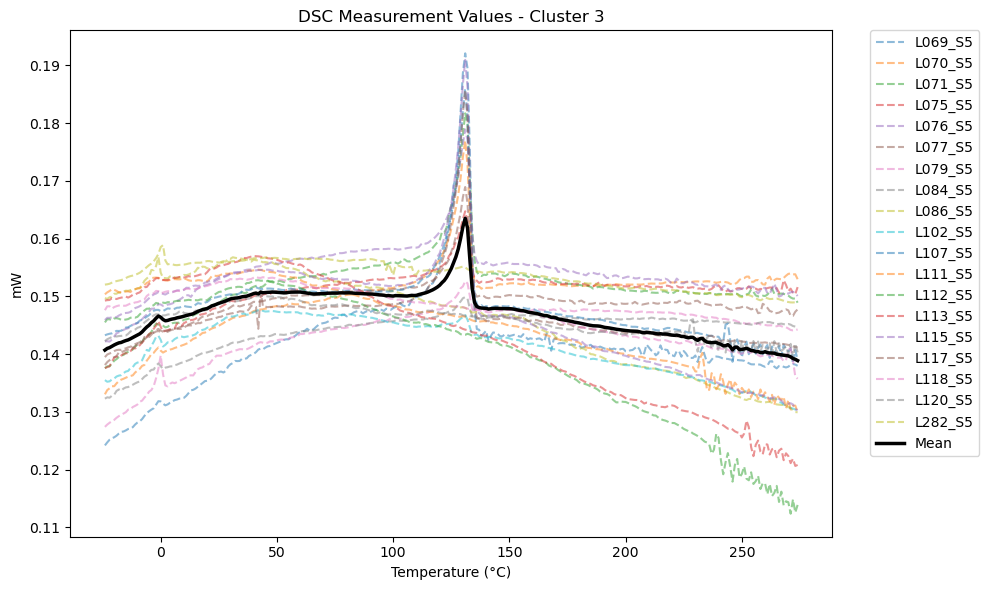

                 Count  Anteil (%)
Matrix                            
Modellsand           8       42.11
Sediment Elbe        1        5.26
Nicht vorhanden     10       52.63
------------------------------------------------------------------------------------------------------------------------


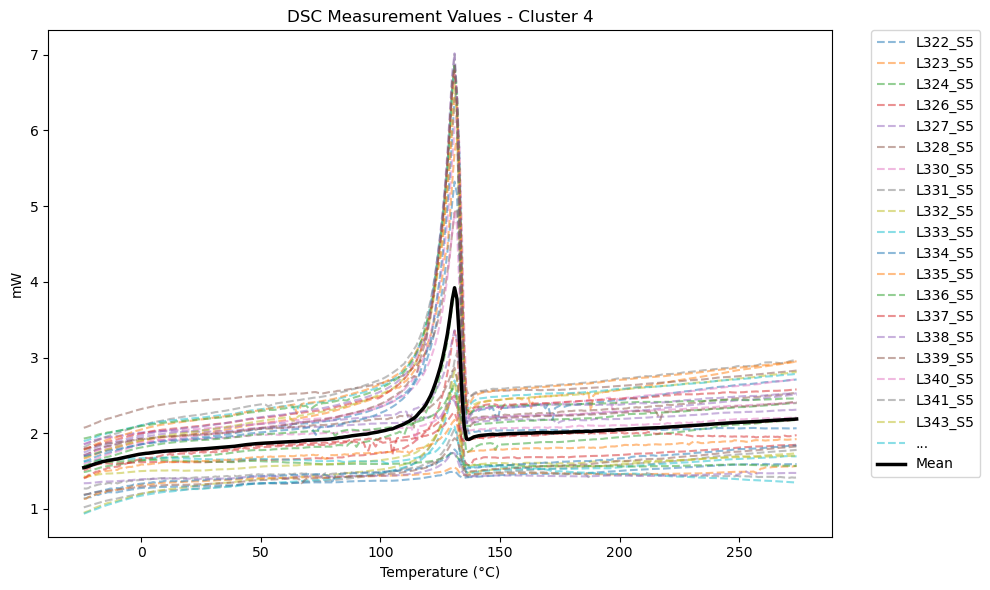

                    Count  Anteil (%)
Matrix                               
Sediment Elbe          16       44.44
Sediment Weißeritz     10       27.78
Sand                   10       27.78
------------------------------------------------------------------------------------------------------------------------


In [11]:
cluster_list = list(cluster_to_samples.items())
results = analyze_clusters_with_percentages(cluster_to_samples, df_dsc)

for i in range(len(cluster_list)):
    cluster, samples = cluster_list[i]
    title = f"DSC Measurement Values - Cluster {cluster}"
    plot_dsc_values_with_mean(df_experiments_s5, samples, title=title)

    # Ausgabe der Ergebnisse
    print(results[cluster])
    print("-" * 120)

## II) Intervalle mit dHm und Tm
> dHm (Peakfläche) und Tm (Peakspitze)

In [12]:
enriched_data = process_and_merge_data(interval_data, df_dsc)
enriched_data

,"[-25, -5)","[-5, 15)","[15, 35)","[35, 55)","[55, 75)","[75, 95)","[95, 115)","[115, 135)","[135, 155)","[155, 175)","[175, 195)","[195, 215)","[215, 235)","[235, 255)","[255, 275)",dHm_J/g,Tm_C
Probe,,,,,,,,,,,,,,,,,
L001_S5,-0.409775,-0.400449,-0.389641,-0.380218,-0.369950,-0.361466,-0.350984,-0.326757,-0.340201,-0.328247,-0.314883,-0.303720,-0.291783,-0.279244,-0.266946,5.675,130.7
L002_S5,-0.430105,-0.420957,-0.411449,-0.401776,-0.391775,-0.383122,-0.372093,-0.346959,-0.358927,-0.347063,-0.333821,-0.323707,-0.313462,-0.302590,-0.291381,4.522,130.8
L003_S5,-0.423493,-0.414713,-0.405592,-0.395556,-0.386346,-0.378948,-0.368215,-0.340201,-0.356403,-0.344092,-0.329523,-0.317811,-0.305474,-0.292270,-0.279037,5.084,130.7
L004_S5,-0.418961,-0.414369,-0.406470,-0.397428,-0.389731,-0.383091,-0.372984,-0.348708,-0.358773,-0.346115,-0.330911,-0.317903,-0.304724,-0.292959,-0.280454,4.175,130.3
L005_S5,-0.387591,-0.382980,-0.373814,-0.362412,-0.351413,-0.341765,-0.330902,-0.313030,-0.317008,-0.305931,-0.292917,-0.282687,-0.271345,-0.260785,-0.249944,5.796,130.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L371_S5,1.717027,1.636203,1.594598,1.596946,1.627160,1.682652,1.839287,2.646520,1.428287,1.325165,1.264741,1.190903,1.122946,1.057315,0.982571,147.800,130.5
L372_S5,3.078538,2.897188,2.802745,2.759632,2.766532,2.818945,2.954687,3.597375,2.511652,2.456219,2.392159,2.306468,2.246739,2.180890,2.111986,150.600,130.5
L373_S5,2.841280,2.919753,2.990364,3.048701,3.107999,3.190102,3.316622,3.831572,3.054413,3.088635,3.081648,3.042589,3.044190,3.045442,3.033550,144.900,130.6


In [13]:
# Spalten, die skaliert werden müssen
columns_to_scale = ['dHm_J/g', 'Tm_C']

# Selektives Skalieren
scaler = StandardScaler()
data_scaled_columns = scaler.fit_transform(enriched_data[columns_to_scale])

# Ersetze die skalierten Spalten im ursprünglichen DataFrame
enriched_data[columns_to_scale] = data_scaled_columns

enriched_data

,"[-25, -5)","[-5, 15)","[15, 35)","[35, 55)","[55, 75)","[75, 95)","[95, 115)","[115, 135)","[135, 155)","[155, 175)","[175, 195)","[195, 215)","[215, 235)","[235, 255)","[255, 275)",dHm_J/g,Tm_C
Probe,,,,,,,,,,,,,,,,,
L001_S5,-0.409775,-0.400449,-0.389641,-0.380218,-0.369950,-0.361466,-0.350984,-0.326757,-0.340201,-0.328247,-0.314883,-0.303720,-0.291783,-0.279244,-0.266946,-0.269418,0.050186
L002_S5,-0.430105,-0.420957,-0.411449,-0.401776,-0.391775,-0.383122,-0.372093,-0.346959,-0.358927,-0.347063,-0.333821,-0.323707,-0.313462,-0.302590,-0.291381,-0.302170,0.058680
L003_S5,-0.423493,-0.414713,-0.405592,-0.395556,-0.386346,-0.378948,-0.368215,-0.340201,-0.356403,-0.344092,-0.329523,-0.317811,-0.305474,-0.292270,-0.279037,-0.286206,0.050186
L004_S5,-0.418961,-0.414369,-0.406470,-0.397428,-0.389731,-0.383091,-0.372984,-0.348708,-0.358773,-0.346115,-0.330911,-0.317903,-0.304724,-0.292959,-0.280454,-0.312026,0.016208
L005_S5,-0.387591,-0.382980,-0.373814,-0.362412,-0.351413,-0.341765,-0.330902,-0.313030,-0.317008,-0.305931,-0.292917,-0.282687,-0.271345,-0.260785,-0.249944,-0.265981,0.033197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L371_S5,1.717027,1.636203,1.594598,1.596946,1.627160,1.682652,1.839287,2.646520,1.428287,1.325165,1.264741,1.190903,1.122946,1.057315,0.982571,3.767691,0.033197
L372_S5,3.078538,2.897188,2.802745,2.759632,2.766532,2.818945,2.954687,3.597375,2.511652,2.456219,2.392159,2.306468,2.246739,2.180890,2.111986,3.847226,0.033197
L373_S5,2.841280,2.919753,2.990364,3.048701,3.107999,3.190102,3.316622,3.831572,3.054413,3.088635,3.081648,3.042589,3.044190,3.045442,3.033550,3.685315,0.041691


### 2) OPTICS anwenden

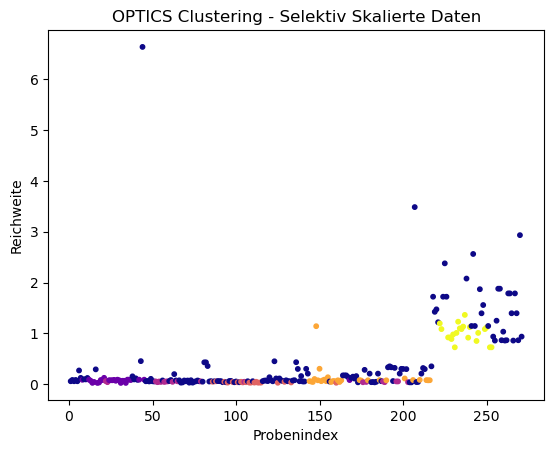

In [14]:
data  = enriched_data

# OPTICS-Clustering ausführen
optics = OPTICS(min_samples=5, xi=0.04, min_cluster_size=0.07)
optics.fit(data)

# Cluster-Labels extrahieren
labels = optics.labels_

# Ergebnisse visualisieren
plt.scatter(range(len(labels)), optics.reachability_, c=labels, cmap="plasma", s=10)
plt.title("OPTICS Clustering - Selektiv Skalierte Daten")
plt.xlabel("Probenindex")
plt.ylabel("Reichweite")
plt.show()


In [15]:
# Cluster analysieren

# Anzahl der Cluster (exkl. Rauschen)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Anzahl der Cluster: {n_clusters}")
print(f"Anzahl der rauschenhaften Punkte: {n_noise}")


Anzahl der Cluster: 5
Anzahl der rauschenhaften Punkte: 155


In [16]:
# Cluster-Zuordnung
data['Cluster'] = labels

# Cluster-Zusammenfassung
cluster_summary = data.groupby('Cluster').mean()
cluster_summary

,"[-25, -5)","[-5, 15)","[15, 35)","[35, 55)","[55, 75)","[75, 95)","[95, 115)","[115, 135)","[135, 155)","[155, 175)","[175, 195)","[195, 215)","[215, 235)","[235, 255)","[255, 275)",dHm_J/g,Tm_C
Cluster,,,,,,,,,,,,,,,,,
-1,0.181164,0.177244,0.176066,0.176313,0.177993,0.181071,0.191715,0.242053,0.167341,0.164200,0.162261,0.160403,0.158313,0.155910,0.153404,0.182017,-0.312773
0,-0.412773,-0.408524,-0.401624,-0.393993,-0.386932,-0.378473,-0.361417,-0.282106,-0.377691,-0.373026,-0.366711,-0.363384,-0.360197,-0.356318,-0.352384,-0.025499,0.056163
1,-0.449893,-0.448777,-0.448003,-0.446344,-0.444943,-0.443469,-0.440445,-0.419793,-0.440199,-0.437736,-0.434934,-0.432803,-0.430444,-0.427454,-0.424345,-0.412054,0.039993
2,-0.364263,-0.363032,-0.360012,-0.360535,-0.360737,-0.361152,-0.365210,-0.372626,-0.359073,-0.359202,-0.359643,-0.360580,-0.361170,-0.362551,-0.361498,-0.419687,0.060804
3,-0.382390,-0.383250,-0.383965,-0.385412,-0.385464,-0.384561,-0.385431,-0.388467,-0.378150,-0.376573,-0.374325,-0.371970,-0.369167,-0.365758,-0.362674,-0.430396,1.530268
4,2.097020,2.116370,2.107490,2.093034,2.066840,2.021220,1.906736,1.343680,2.086909,2.093300,2.086941,2.082690,2.078151,2.075943,2.070728,0.075815,0.027130


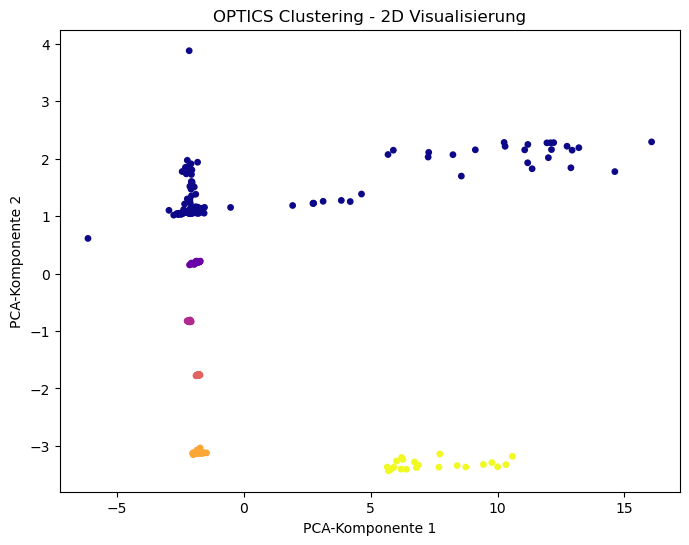

In [17]:
# PCA für 2D-Visualisierung
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# Visualisierung
plt.figure(figsize=(8, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap="plasma", s=15)
plt.title("OPTICS Clustering - 2D Visualisierung")
plt.xlabel("PCA-Komponente 1")
plt.ylabel("PCA-Komponente 2")
plt.show()


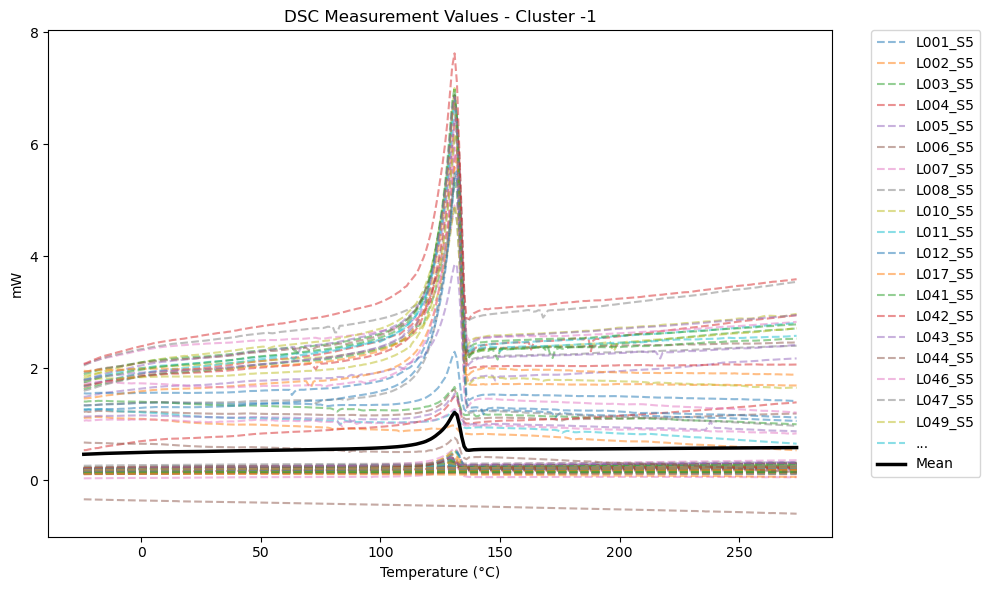

                    Count  Anteil (%)
Matrix                               
Modellsand             51       32.90
Sand                   40       25.81
Sediment Elbe          34       21.94
Sediment Weißeritz     30       19.35
------------------------------------------------------------------------------------------------------------------------


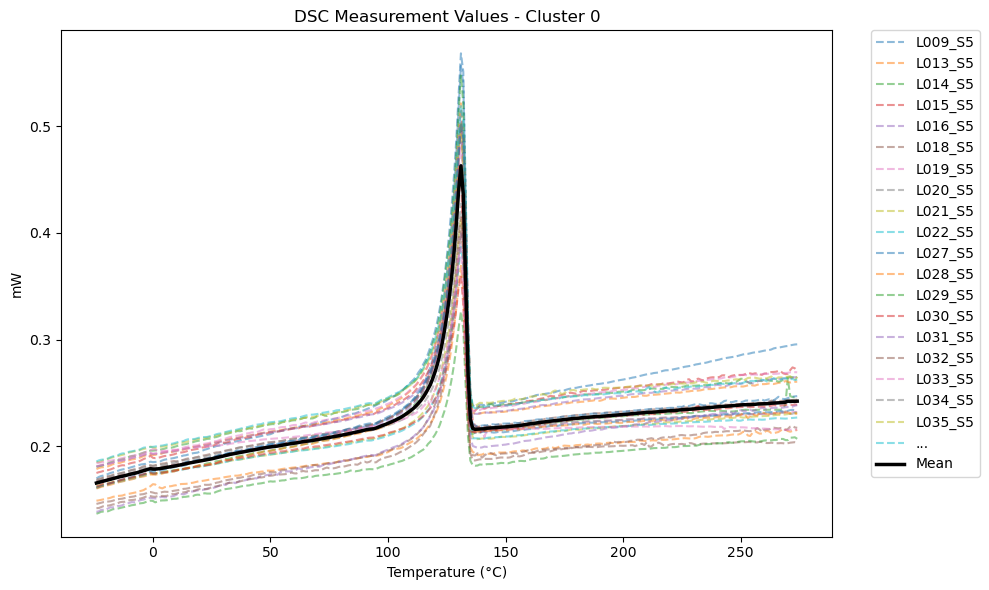

            Count  Anteil (%)
Matrix                       
Modellsand     27       100.0
------------------------------------------------------------------------------------------------------------------------


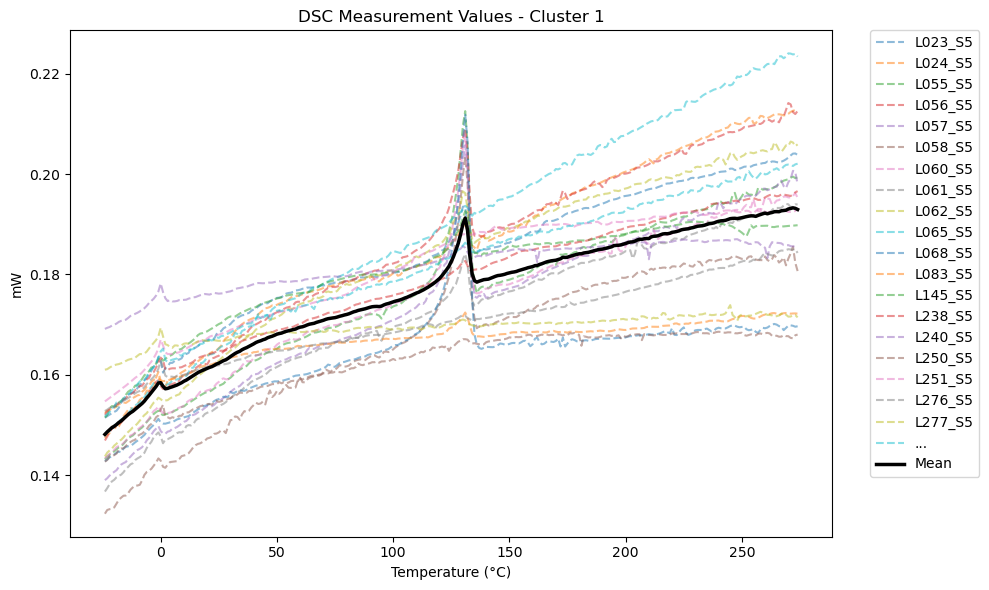

               Count  Anteil (%)
Matrix                          
Modellsand        12        60.0
Sediment Elbe      7        35.0
Sand               1         5.0
------------------------------------------------------------------------------------------------------------------------


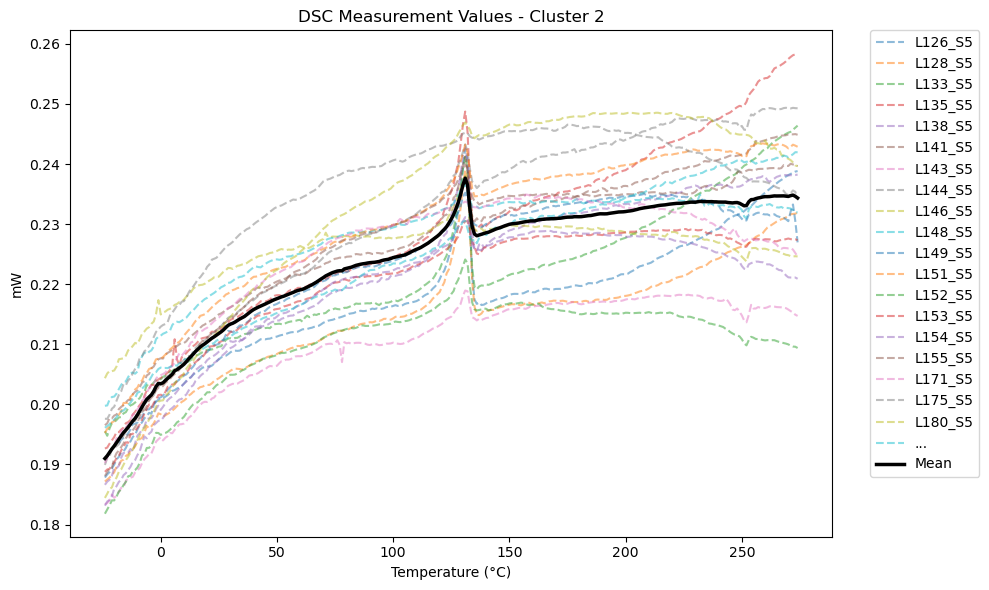

                    Count  Anteil (%)
Matrix                               
Sand                   16        80.0
Sediment Weißeritz      4        20.0
------------------------------------------------------------------------------------------------------------------------


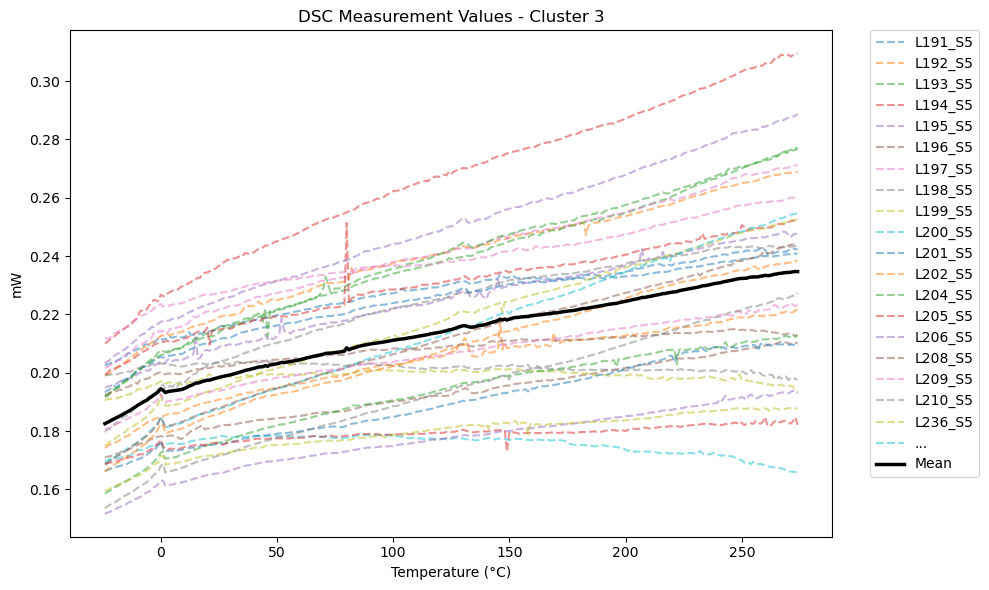

                    Count  Anteil (%)
Matrix                               
Sediment Weißeritz     18       62.07
Sediment Elbe          11       37.93
------------------------------------------------------------------------------------------------------------------------


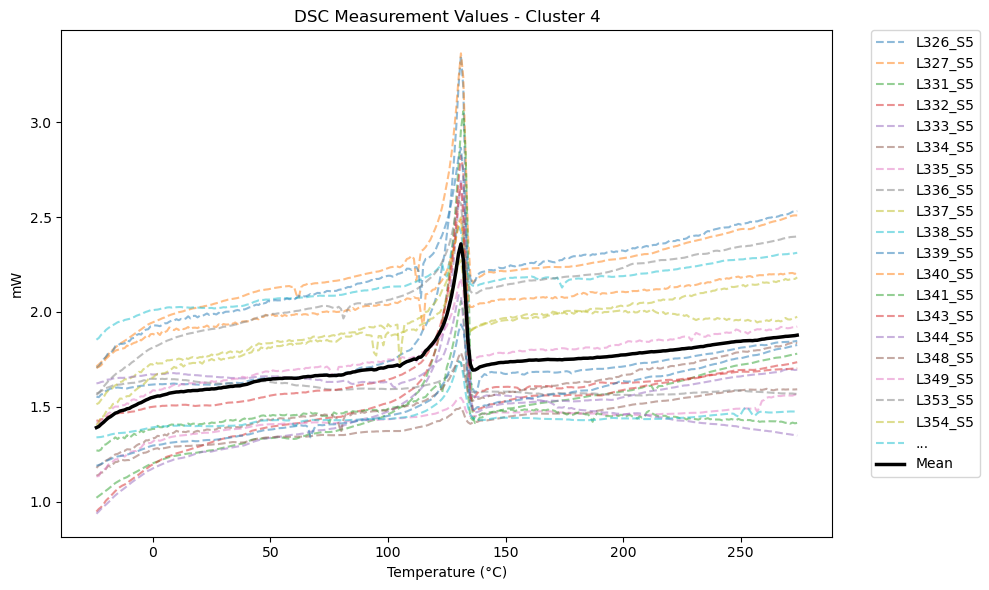

                    Count  Anteil (%)
Matrix                               
Sediment Elbe          11       52.38
Sediment Weißeritz     10       47.62
------------------------------------------------------------------------------------------------------------------------


In [18]:
cluster_to_samples = (data.reset_index()  # Index als Spalte hinzufügen
    .groupby('Cluster')['Probe']  # 'Probe' ist jetzt eine Spalte
    .apply(list)
    .to_dict()
)


cluster_list = list(cluster_to_samples.items())
results = analyze_clusters_with_percentages(cluster_to_samples, df_dsc)

for i in range(len(cluster_list)):
    cluster, samples = cluster_list[i]
    title = f"DSC Measurement Values - Cluster {cluster}"
    plot_dsc_values_with_mean(df_experiments_s5, samples, title=title)

    # Ausgabe der Ergebnisse
    print(results[cluster])
    print("-" * 120)